# Data Loading

Dataset Link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [74]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)


# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows to confirm the data is loaded correctly
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Data Preprocessing

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Handle missing values
# Check for missing values
print("Missing values before preprocessing:\n", df.isnull().sum())

# You can either fill missing values with a strategy (mean, median, mode) or drop rows/columns
# For simplicity, let's fill missing values with the mode (most frequent value) for categorical columns
# and with the mean for numerical columns.
df['mainroad'] = df['mainroad'].fillna(df['mainroad'].mode()[0])
df['guestroom'] = df['guestroom'].fillna(df['guestroom'].mode()[0])
df['basement'] = df['basement'].fillna(df['basement'].mode()[0])
df['hotwaterheating'] = df['hotwaterheating'].fillna(df['hotwaterheating'].mode()[0])
df['airconditioning'] = df['airconditioning'].fillna(df['airconditioning'].mode()[0])
df['prefarea'] = df['prefarea'].fillna(df['prefarea'].mode()[0])
df['furnishingstatus'] = df['furnishingstatus'].fillna(df['furnishingstatus'].mode()[0])

# For numerical columns, we can fill missing values with the mean
df['price'] = df['price'].fillna(df['price'].mean())
df['area'] = df['area'].fillna(df['area'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['stories'] = df['stories'].fillna(df['stories'].mean())
df['parking'] = df['parking'].fillna(df['parking'].mean())

# Check again for missing values after handling them
print("\nMissing values after preprocessing:\n", df.isnull().sum())

# 2. Encode categorical variables (Label Encoding for 'yes'/'no' columns and 'furnishingstatus' column)
label_encoder = LabelEncoder()

# Encode binary categorical columns ('yes'/'no')
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Encode 'furnishingstatus' (furnishing status as categorical)
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

# 3. Feature Scaling (Standardizing numerical columns)
scaler = StandardScaler()

# List of numerical columns for scaling
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Apply standardization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show the preprocessed data
print("\nData after preprocessing:\n", df.head())

Missing values before preprocessing:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after preprocessing:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data after preprocessing:
       price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217         1          0   
1  4.004484  1.757010  1.403419   5.405809  2.532024         1          0   
2  4.004484  2.218232  0.047278   1.421812  0.224410         1     

# Visualizations

## Pie Chart

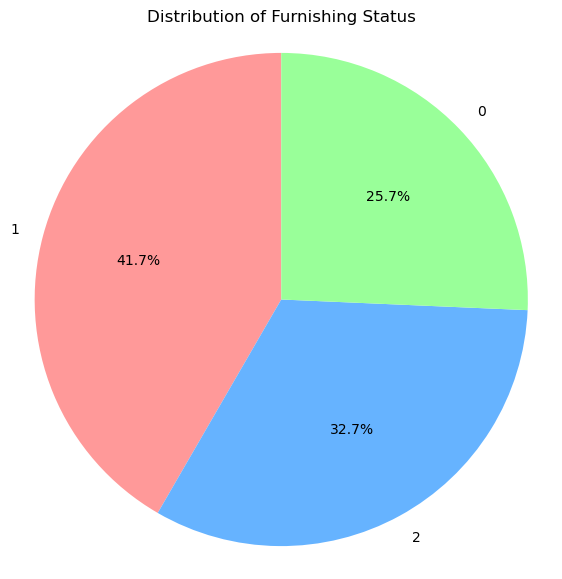

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category in the 'furnishingstatus' column
furnishing_status_counts = df['furnishingstatus'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(furnishing_status_counts, labels=furnishing_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Furnishing Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the chart
plt.show()

## Scatter Graph

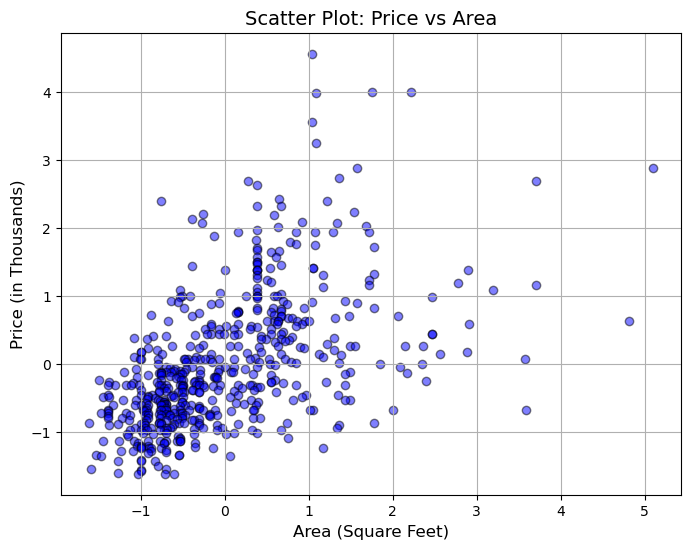

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot of 'price' vs 'area'
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5, edgecolor='k')

# Add labels and title
plt.title('Scatter Plot: Price vs Area', fontsize=14)
plt.xlabel('Area (Square Feet)', fontsize=12)
plt.ylabel('Price (in Thousands)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

## Boxplot

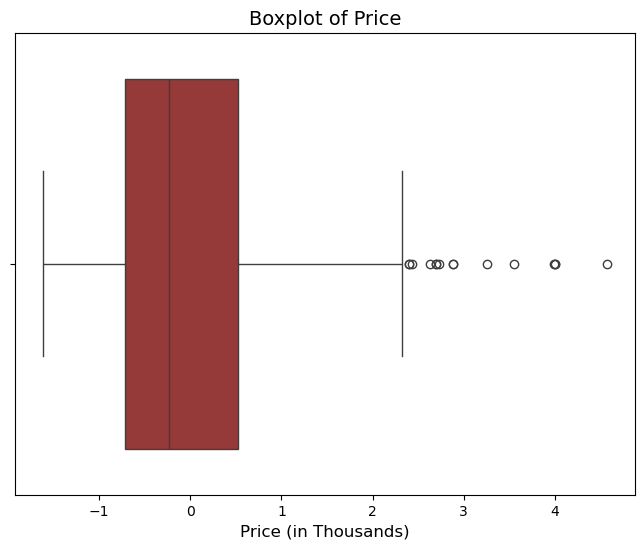

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='brown')

# Add title and labels
plt.title('Boxplot of Price', fontsize=14)
plt.xlabel('Price (in Thousands)', fontsize=12)

# Show the plot
plt.show()

## Elbow Plot

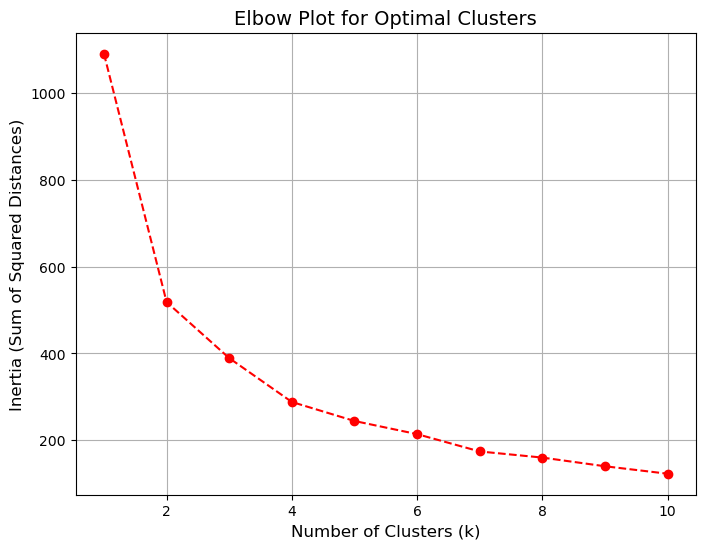

In [87]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical columns for clustering (example: 'price' and 'area')
data = df[['price', 'area']]

# List to store the sum of squared distances (inertia)
inertia = []

# Range of k values to test
k_values = range(1, 11)

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='r')
plt.title('Elbow Plot for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

# K-Means Clustering

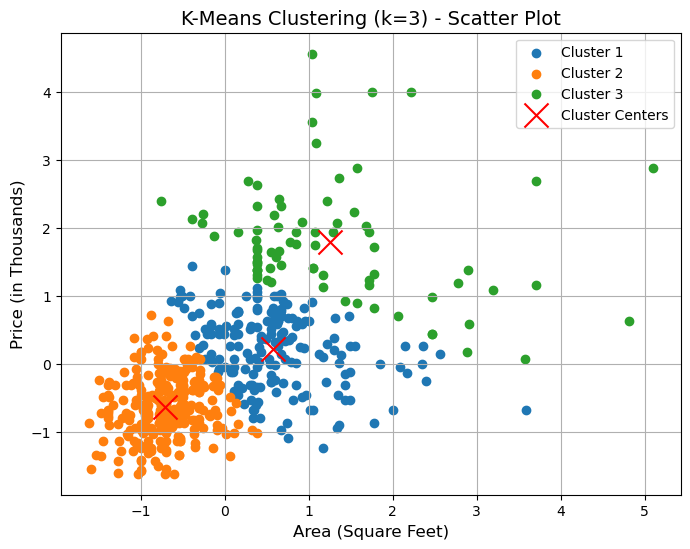

Mean Squared Error (MSE): 0.71
R-squared (R²): 0.29


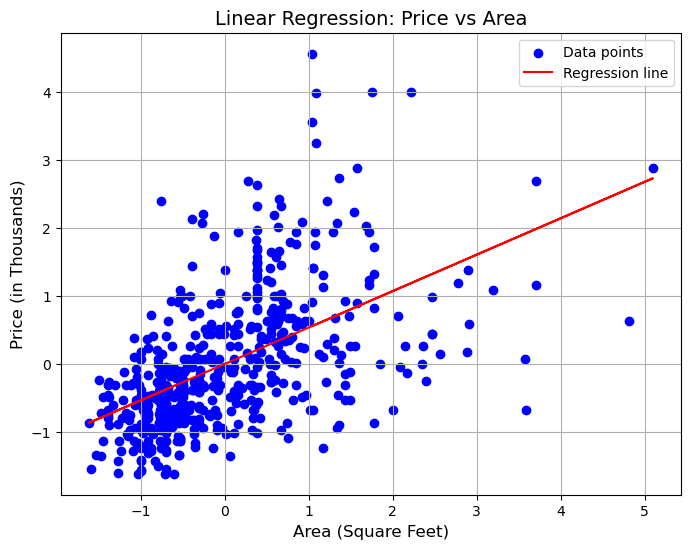

In [89]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select numerical columns for clustering and regression (e.g., 'price' and 'area')
data = df[['price', 'area']]

# --- K-Means Clustering ---
# Perform K-Means clustering for a chosen number of clusters (e.g., 3 clusters)
k = 3  # You can change this to any number of clusters based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get the cluster labels (which cluster each point belongs to)
labels = kmeans.labels_

# Plot the scatter plot for K-Means clustering
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for i in range(k):
    plt.scatter(data[labels == i]['area'], data[labels == i]['price'], label=f'Cluster {i+1}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
            s=300, c='red', marker='x', label='Cluster Centers')

plt.title(f'K-Means Clustering (k={k}) - Scatter Plot', fontsize=14)
plt.xlabel('Area (Square Feet)', fontsize=12)
plt.ylabel('Price (in Thousands)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Linear Regression (Line Fitting) ---
# Assume 'area' predicts 'price' (simple linear regression)
X = df[['area']]  # Predictor variable (independent variable)
y = df['price']   # Response variable (dependent variable)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X, y)

# Predict the target variable (price)
y_pred = regressor.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y, y_pred)

# Display the MSE and R² values
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')

# Plot the line fitting (regression line)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Linear Regression: Price vs Area', fontsize=14)
plt.xlabel('Area (Square Feet)', fontsize=12)
plt.ylabel('Price (in Thousands)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()